In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd

In [3]:
df = pd.read_csv("AAPL.csv")

In [4]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2643,2025-07-09T00:00:00.000Z,211.14,211.33,207.22,209.530,48749367,211.14,211.33,207.22,209.530,48749367,0.0,1.0
2644,2025-07-10T00:00:00.000Z,212.41,213.48,210.03,210.505,44443635,212.41,213.48,210.03,210.505,44443635,0.0,1.0
2645,2025-07-11T00:00:00.000Z,211.16,212.13,209.86,210.565,39765812,211.16,212.13,209.86,210.565,39765812,0.0,1.0
2646,2025-07-14T00:00:00.000Z,208.62,210.91,207.54,209.925,38840111,208.62,210.91,207.54,209.925,38840111,0.0,1.0
2647,2025-07-15T00:00:00.000Z,209.11,211.89,208.92,209.220,42296339,209.11,211.89,208.92,209.220,42296339,0.0,1.0


In [5]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,109.33,111.44,107.350,111.39,53204626,24.289246,24.758014,23.849361,24.746905,212818504,0.0,1.0
1,2015-01-05T00:00:00.000Z,106.25,108.65,105.410,108.29,64285491,23.604980,24.138175,23.418362,24.058195,257141964,0.0,1.0
2,2015-01-06T00:00:00.000Z,106.26,107.43,104.630,106.54,65797116,23.607201,23.867134,23.245073,23.669407,263188464,0.0,1.0
3,2015-01-07T00:00:00.000Z,107.75,108.20,106.695,107.20,40105934,23.938227,24.038201,23.703843,23.816036,160423736,0.0,1.0
4,2015-01-08T00:00:00.000Z,111.89,112.15,108.700,109.23,59364547,24.857988,24.915750,24.149283,24.267030,237458188,0.0,1.0


In [6]:
df1 = df.reset_index()['close']

In [7]:
df1.shape

(2648,)

In [8]:
import matplotlib.pyplot as plt

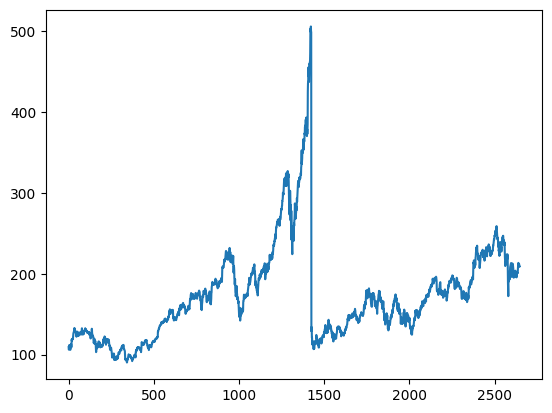

In [9]:
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
df1

0       109.33
1       106.25
2       106.26
3       107.75
4       111.89
         ...  
2643    211.14
2644    212.41
2645    211.16
2646    208.62
2647    209.11
Name: close, Length: 2648, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(2648, 1)

In [15]:
df1

array([[0.04567649],
       [0.03826819],
       [0.03829224],
       ...,
       [0.29060734],
       [0.2844979 ],
       [0.28567649]])

In [16]:
train_size = int(len(df1)*0.70)
test_size = len(df1)-train_size
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1), :1]

In [17]:
train_size, test_size

(1853, 795)

In [18]:
len(train_data), len(test_data)

(1853, 795)

In [19]:
import numpy as np

def create_dataset(dataset, time_step):
    dataX, datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        datay.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(datay)

In [20]:
X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)

In [21]:
print(X_train)

[[0.04567649 0.03826819 0.03829224 ... 0.10150331 0.09447986 0.10031269]
 [0.03826819 0.03829224 0.04187613 ... 0.09447986 0.10031269 0.09967529]
 [0.03829224 0.04187613 0.05183403 ... 0.10031269 0.09967529 0.09606735]
 ...
 [0.20541191 0.20202044 0.21397474 ... 0.16630186 0.18203247 0.15978352]
 [0.20202044 0.21397474 0.19704149 ... 0.18203247 0.15978352 0.16101022]
 [0.21397474 0.19704149 0.19434756 ... 0.15978352 0.16101022 0.1484546 ]]


In [22]:
X_train.shape, y_train.shape

((1752, 100), (1752,))

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [24]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(100,1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

c:\Users\DJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='mean_squared_error', optimizer="adam")

In [25]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0244 - val_loss: 0.0022
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0045 - val_loss: 5.6573e-04
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0035 - val_loss: 9.4829e-04
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0036 - val_loss: 6.2236e-04
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0032 - val_loss: 8.5265e-04
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0019 - val_loss: 5.5892e-04
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0016 - val_loss: 3.5673e-04
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0022 - val_loss: 3.2884e-04
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0011 - val_loss: 3.4464e-04
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0013 - val_loss: 3.9752e-04
Epoch 12/100
28/

In [26]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [27]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [28]:
import math
from sklearn.metrics import mean_squared_error

In [29]:
math.sqrt(mean_squared_error(y_train,train_pred))

183.69533980986387

In [30]:
math.sqrt(mean_squared_error(y_test,test_pred))

194.39782321262106

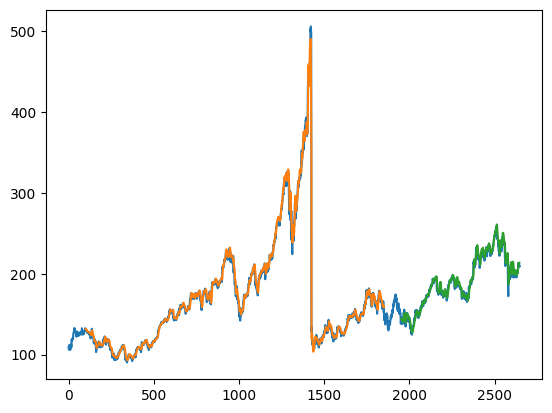

In [31]:
look_back = 100
trainpredplot = np.empty_like(df1)
trainpredplot[:,:] = np.nan
trainpredplot[look_back:len(train_pred)+look_back,:] = train_pred

testpredplot = np.empty_like(df1)
testpredplot[:,:] = np.nan
testpredplot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredplot)
plt.plot(testpredplot)
plt.show()

In [32]:
len(test_data)-100

695

In [33]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_inp = list(x_input)
temp_inp = temp_inp[0].tolist()

In [35]:
import pickle

In [36]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [37]:
pickle.dump(model, open('model.pkl', 'wb'))

In [38]:
lst_output = []
n_steps = 100
i=0
while(i<30):
    if (len(temp_inp)>100):
        x_input = np.array(temp_inp[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_inp.extend(yhat[0].tolist())
        temp_inp = temp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_inp.extend(yhat[0].tolist())
        print(len(temp_inp))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.29337043]
101
1 day input [0.37332532 0.37705352 0.3769092  0.36084185 0.35348166 0.36440168
 0.35523752 0.35018641 0.3497294  0.34874324 0.35773903 0.3298617
 0.31389056 0.30460613 0.2870475  0.29621167 0.29743836 0.29428743
 0.30042093 0.29767889 0.30770896 0.31362598 0.32088996 0.31555021
 0.32113049 0.306819   0.31699339 0.31954299 0.3212267  0.27143716
 0.23581479 0.21917017 0.19742634 0.2609982  0.24072159 0.25931449
 0.26982562 0.26891161 0.24998196 0.2565003  0.24731209 0.26313891
 0.27482862 0.28389657 0.28608539 0.28815394 0.2907276  0.29383043
 0.29580277 0.27663259 0.26109441 0.2601804  0.25474444 0.257727
 0.2602285  0.28971738 0.2948647  0.29342153 0.29130487 0.29084787
 0.28488274 0.28026458 0.26879134 0.26703548 0.25238725 0.26426939
 0.2647745  0.26364402 0.26580878 0.26785328 0.27162959 0.2705472
 0.26527962 0.27319302 0.26725195 0.27018641 0.26082983 0.26184005
 0.2552255  0.25996392 0.25327721 0.25553818 0.26616957 0.26737222
 0.26448587 0.26751654 0.26616957 0.2

In [39]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)  

In [40]:
len(df1)

2648

In [41]:
len(df1)-100

2548

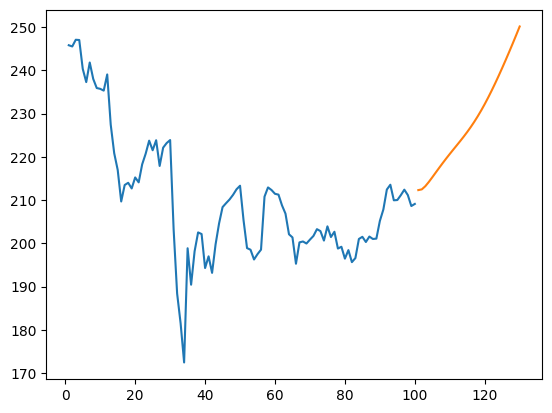

In [42]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

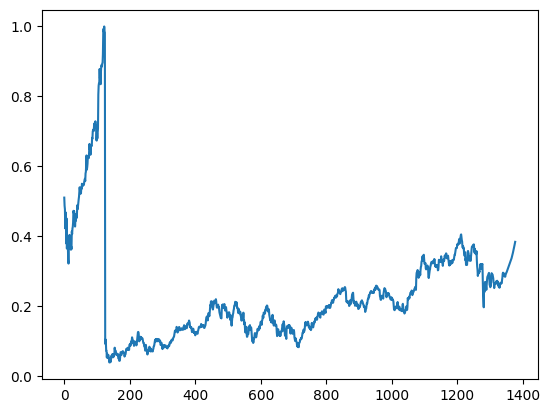

In [43]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1300:])

In [44]:
print(scaler.inverse_transform(lst_output))

[[212.30875449]
 [212.47682912]
 [213.20603636]
 [214.18903443]
 [215.27231972]
 [216.38603562]
 [217.49604682]
 [218.5839413 ]
 [219.64141756]
 [220.6684632 ]
 [221.67257437]
 [222.6668972 ]
 [223.66850552]
 [224.6958981 ]
 [225.76718956]
 [226.89842537]
 [228.10198345]
 [229.38648746]
 [230.75605099]
 [232.21064925]
 [233.74711033]
 [235.35946209]
 [237.04034468]
 [238.78164246]
 [240.57566102]
 [242.41578395]
 [244.29710468]
 [246.21681061]
 [248.17466632]
 [250.17240645]]


In [45]:
pred_30_2 = pd.DataFrame(scaler.inverse_transform(lst_output))

In [46]:
pred_30_2.to_csv('pred_30_2.csv')